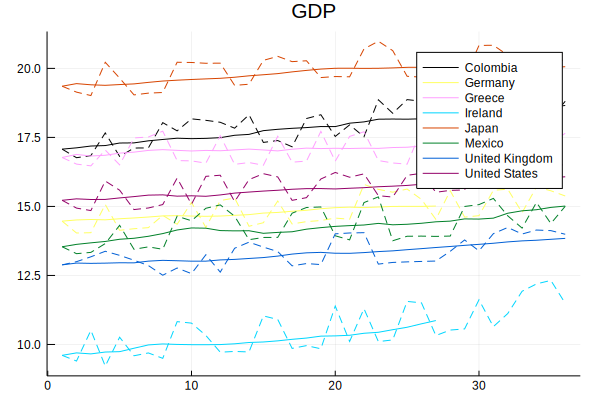

In [1]:
include("figure.jl")

In [2]:
using FileIO
parameters = load("experiments/labor_adjustment/common_parameters.jld2")["parameters"]

Dict{Symbol,Any} with 45 entries:
  :S_nt                     => [0.0 0.0 … 0.0 0.0]…
  :one_over_rho             => 0.001
  :inner_tolerance          => 0.0002
  :S_nt_data                => [1184.95 -1239.14 … -406.84 1074.1]…
  :eta                      => 4.0
  :S                        => 100
  :sigma                    => 0.999
  :d                        => [0.991383 7.85e-7 … 0.000689 0.0004425; 7.42e-5 …
  :adjustment_tolerance     => 0.0004
  :middle_step_size         => 0.449329
  :A_njs                    => Array{Float64,4}[[1464.3 501.846 … 1566.09 7165.…
  :gamma_jk                 => [0.17112 0.273944 … 0.0195213 0.0108426; 0.04826…
  :p_sectoral               => [1.26077 2.37256 … 1.79398 1.0]…
  :B_j                      => [5.5087]…
  :max_iter_adjustment      => 100
  :w_njt                    => [53118.2 20374.8 … 1.48903e5 1.12031e6]…
  :global_sectoral_shock    => [7.01883e-15]…
  :country_shock_njs        => Array{Float64,4}[[-4.8908e-16 -3.07316e-16 … 4.3…
  :i

MethodError: [91mMethodError: no method matching complete_type(::QuoteNode)[0m
Closest candidates are:
  complete_type([91m::Type{#s13} where #s13<:Function[39m) at /Applications/JuliaPro-0.6.4.1.app/Contents/Resources/pkgs-0.6.4.1/v0.6/IJulia/src/handlers.jl:67
  complete_type([91m::Type{#s13} where #s13<:Type[39m) at /Applications/JuliaPro-0.6.4.1.app/Contents/Resources/pkgs-0.6.4.1/v0.6/IJulia/src/handlers.jl:68
  complete_type([91m::Type{#s13} where #s13<:Tuple[39m) at /Applications/JuliaPro-0.6.4.1.app/Contents/Resources/pkgs-0.6.4.1/v0.6/IJulia/src/handlers.jl:69
  ...[39m

In [3]:
parameters[:A]

1×25×24×36 Array{Float64,4}:
[:, :, 1, 1] =
 1464.3  501.846  760.151  2108.62  …  948.01  943.688  1566.09  7165.76

[:, :, 2, 1] =
 248.114  123.49  196.086  250.401  …  144.462  185.231  269.984  580.413

[:, :, 3, 1] =
 664.228  539.696  689.62  916.319  …  586.707  656.368  1640.8  4490.71

...

[:, :, 22, 1] =
 591.944  52.9334  315.956  1014.46  …  573.326  570.096  1139.54  3309.09

[:, :, 23, 1] =
 781.847  502.935  811.546  1090.1  …  724.518  784.631  1560.05  3866.28

[:, :, 24, 1] =
 18763.0  15850.8  11275.0  17997.8  …  39318.1  11067.6  33610.2  59285.3

[:, :, 1, 2] =
 1902.04  770.392  1047.15  3197.47  …  1246.31  645.551  1397.18  11167.3

[:, :, 2, 2] =
 240.304  108.578  164.153  261.858  …  137.358  162.461  219.842  468.8

[:, :, 3, 2] =
 754.258  763.219  711.764  906.661  …  527.607  727.285  1184.36  4153.15

...

[:, :, 22, 2] =
 711.9  56.0626  398.525  1063.73  …  609.695  522.575  1278.85  3664.7

[:, :, 23, 2] =
 1228.79  461.795  1154.42  1196.97  …  97

In [7]:
using Base.Test
for t=1:36
        @test parameters[:A_njs][t][:,:,:,1] ≈ parameters[:A][:,:,:,t]
end


In [9]:
A_US = parameters[:A][1,end,:,:]
w_US = parameters[:w_njt][1,end,:,:]

24×36 Array{Float64,2}:
 1.12031e6  4.45688e6  3.0739e6   …  1.45804e7  6.20451e6  1.2997e7
 1.12031e6  6.26857e5  6.79931e5     1.54483e7  6.20451e6  1.2997e7
 1.12031e6  1.16281e6  1.16537e6     1.29605e7  1.29434e7  1.2997e7
 1.12031e6  1.48061e6  6.79931e5     1.23111e7  1.3613e7   1.2997e7
 1.12031e6  1.11727e6  6.79931e5     1.13331e7  1.30599e7  1.2997e7
 1.12031e6  1.24283e6  1.23323e6  …  1.17025e7  1.25732e7  1.2997e7
 1.12031e6  1.68845e6  6.79931e5     1.36029e7  1.36202e7  1.2997e7
 1.12031e6  1.06021e6  1.85821e6     7.17914e6  1.1585e7   1.2997e7
 1.12031e6  6.26857e5  6.79931e5     1.07169e7  1.06661e7  1.2997e7
 1.12031e6  1.34849e6  1.50711e6     2.1101e7   2.1743e7   1.2997e7
 1.12031e6  6.26857e5  1.73006e6  …  1.54609e7  1.3974e7   1.2997e7
 1.12031e6  1.44595e6  1.44065e6     1.10984e7  1.27569e7  1.2997e7
 1.12031e6  1.18394e6  6.79931e5     1.13981e7  1.44715e7  1.2997e7
 1.12031e6  1.63378e6  2.77092e6     1.24508e7  1.17866e7  1.2997e7
 1.12031e6  1.224e6    1

In [11]:
data = load("data/impvol_data.jld2")

Dict{String,Any} with 10 entries:
  "import_shares"             => [0.0 7.85e-7 … 0.000689 0.0004425; 7.42e-5 0.0…
  "pwt"                       => [0.824111 0.620073 … 0.747101 1.0]…
  "va"                        => [3271.5 1407.45 … 4209.16 41311.0]…
  "p_sectoral_data"           => [33.0109 64.7924 … 16.8926 36.7882]…
  "io_values"                 => [2.49202e5 2423.0 … 6491.5 0.0; 4183.8 56086.1…
  "total_output"              => [2.00728e6 8.11942e5 … 1.74308e6 66853.4]…
  "intermediate_input_shares" => [0.973154 0.0268455 … 0.528231 0.294862]…
  "trade_balance"             => [1184.95 -1239.14 … -406.84 1074.1]…
  "output_shares"             => [0.967079 0.032921 … 0.521898 0.318506]…
  "beta"                      => [0.230777 0.441 … 0.297884 0.370242]…

In [12]:
V_njt = data["va"] ./ sum(data["va"], 3)

1×25×24×36 Array{Float64,4}:
[:, :, 1, 1] =
 0.061589  0.0690781  0.0489951  …  0.0588753  0.0282678  0.0368746

[:, :, 2, 1] =
 0.0398761  0.0331929  0.0498193  …  0.0237049  0.0330631  0.0218462

[:, :, 3, 1] =
 0.00198435  0.0129574  0.00223406  …  0.000918456  0.00310743  0.00161915

...

[:, :, 22, 1] =
 0.00743452  0.00224268  0.00216786  …  0.00432074  0.0127913  0.00836181

[:, :, 23, 1] =
 0.00817001  0.012592  0.0186192  …  0.0046242  0.00744794  0.00765139

[:, :, 24, 1] =
 0.701881  0.634067  0.623813  0.737393  …  0.690626  0.672794  0.71855

[:, :, 1, 2] =
 0.0650499  0.0728736  0.0465889  …  0.0558479  0.0279351  0.0484266

[:, :, 2, 2] =
 0.0353069  0.0306555  0.0466773  0.0269199  …  0.0225664  0.0315  0.0209928

[:, :, 3, 2] =
 0.00175697  0.013022  0.00211397  …  0.00080321  0.00259177  0.00153386

...

[:, :, 22, 2] =
 0.00734573  0.00234169  0.00209567  …  0.00432165  0.0124616  0.00832912

[:, :, 23, 2] =
 0.00859778  0.0109665  0.0189559  …  0.00462353  0.0073965

MethodError: [91mMethodError: no method matching complete_type(::QuoteNode)[0m
Closest candidates are:
  complete_type([91m::Type{#s13} where #s13<:Function[39m) at /Applications/JuliaPro-0.6.4.1.app/Contents/Resources/pkgs-0.6.4.1/v0.6/IJulia/src/handlers.jl:67
  complete_type([91m::Type{#s13} where #s13<:Type[39m) at /Applications/JuliaPro-0.6.4.1.app/Contents/Resources/pkgs-0.6.4.1/v0.6/IJulia/src/handlers.jl:68
  complete_type([91m::Type{#s13} where #s13<:Tuple[39m) at /Applications/JuliaPro-0.6.4.1.app/Contents/Resources/pkgs-0.6.4.1/v0.6/IJulia/src/handlers.jl:69
  ...[39m

MethodError: [91mMethodError: no method matching complete_type(::QuoteNode)[0m
Closest candidates are:
  complete_type([91m::Type{#s13} where #s13<:Function[39m) at /Applications/JuliaPro-0.6.4.1.app/Contents/Resources/pkgs-0.6.4.1/v0.6/IJulia/src/handlers.jl:67
  complete_type([91m::Type{#s13} where #s13<:Type[39m) at /Applications/JuliaPro-0.6.4.1.app/Contents/Resources/pkgs-0.6.4.1/v0.6/IJulia/src/handlers.jl:68
  complete_type([91m::Type{#s13} where #s13<:Tuple[39m) at /Applications/JuliaPro-0.6.4.1.app/Contents/Resources/pkgs-0.6.4.1/v0.6/IJulia/src/handlers.jl:69
  ...[39m

In [13]:
w_njt = parameters[:w_njt]
L_njt = V_njt ./ w_njt .* sum(data["va"], 3)

1×25×24×36 Array{Float64,4}:
[:, :, 1, 1] =
 0.061589  0.0690781  0.0489951  …  0.0588753  0.0282678  0.0368746

[:, :, 2, 1] =
 0.0398761  0.0331929  0.0498193  …  0.0237049  0.0330631  0.0218462

[:, :, 3, 1] =
 0.00198435  0.0129574  0.00223406  …  0.000918456  0.00310743  0.00161915

...

[:, :, 22, 1] =
 0.00743452  0.00224268  0.00216786  …  0.00432074  0.0127913  0.00836181

[:, :, 23, 1] =
 0.00817001  0.012592  0.0186192  …  0.0046242  0.00744794  0.00765139

[:, :, 24, 1] =
 0.701881  0.634067  0.623813  0.737393  …  0.690626  0.672794  0.71855

[:, :, 1, 2] =
 0.0424915  0.026038  0.0216446  0.0165588  …  0.111696  0.0269848  0.0136223

[:, :, 2, 2] =
 0.0706137  0.061311  0.0933545  0.0205378  …  0.0451327  0.063  0.0419855

[:, :, 3, 2] =
 0.00204298  0.00796859  0.00231227  …  0.000843955  0.00518354  0.00165378

...

[:, :, 22, 2] =
 0.006884  0.00216321  0.00196834  …  0.00618674  0.00893756  0.0069211

[:, :, 23, 2] =
 0.00593695  0.0219329  0.0121671  …  0.00552461  0

In [14]:
L_njt[1,end,:,:]

24×36 Array{Float64,2}:
 0.0368746   0.0136223   0.0191483   0.024105    …  0.0207913   0.0113103  
 0.0218462   0.0419855   0.041513    0.0145093      0.0334255   0.0164812  
 0.00161915  0.00165378  0.0017135   0.00154629     0.00209762  0.0019998  
 0.00865998  0.00702248  0.0146011   0.0133867      0.00190913  0.00178856 
 0.00871518  0.00899761  0.0144072   0.0140779      0.00077513  0.000607881
 0.0013236   0.00123714  0.0011903   0.00111885  …  0.00018224  0.000158218
 0.00480838  0.00367992  0.00801631  0.00701165     0.00244182  0.00237686 
 0.00800987  0.00949433  0.00640712  0.0090633      0.00520773  0.00472418 
 0.0123889   0.0231348   0.0218047   0.0126617      0.0044196   0.00382439 
 0.00355108  0.00380609  0.0041457   0.00534638     0.00433179  0.00665762 
 0.0204049   0.0393938   0.0164784   0.0182959   …  0.0188255   0.0213035  
 0.0071451   0.00616357  0.00646403  0.0123682      0.00583991  0.00574643 
 0.00771548  0.00772925  0.0134559   0.00850123     0.00414766  

In [15]:
wage_ratio = w_njt ./ sum(data["va"], 3)

1×25×24×36 Array{Float64,4}:
[:, :, 1, 1] =
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0

[:, :, 2, 1] =
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0

[:, :, 3, 1] =
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0

...

[:, :, 22, 1] =
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0

[:, :, 23, 1] =
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0

[:, :, 24, 1] =
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0

[:, :, 1, 2] =
 1.53089  2.79874  2.15245  3.50582  …  0.5  1.77697  0.5  1.03522  3.55494

[:, :, 2, 2] =
 0.5  0.5  0.5  1.31075  0.783825  …  1.21808  0.5  0.5  0.5  0.5  0.5

[:, :, 3, 2] =
 0.860006  1.63417  0.914242  0.871972  …  0.545606  0.951721  0.5  0.927491

...

[:, :, 22, 2] =
 1.06707  1.08251  1.06469  1.165  …  0.846807  0.698534  1.3943  1.20344

[:, :, 23, 2] =
 1.44818  0.5  

In [18]:
mean(wage_ratio[1,end,:,:], 1)

1×36 Array{Float64,2}:
 1.0  1.12633  0.901342  0.887479  …  1.02272  0.957281  0.971533  1.0

In [20]:
include("calibration_utils.jl")
weights = parameters[:bp_weights]
V_c, V_t = DetrendUtilities.detrend(V_njt, weights)

([6.33174e-17 7.24247e-17 … 2.66714e-17 3.81639e-17]

[3.98986e-17 3.29597e-17 … 3.23092e-17 2.32019e-17]

[2.10064e-18 1.22515e-17 … 3.03577e-18 1.51788e-18]

...

[7.86047e-18 2.12775e-18 … 1.33357e-17 7.96889e-18]

[7.80626e-18 1.26852e-17 … 7.20994e-18 7.37257e-18]

[7.28584e-16 6.31439e-16 … 6.8695e-16 7.42462e-16]

[0.00081274 0.00503421 … 3.64574e-5 0.00908267]

[-0.00241938 -0.000279395 … -0.00031265 -0.00058927]

[-0.000120396 0.00103633 … -0.000292543 -6.72516e-5]

...

[7.15721e-5 8.93182e-5 … 0.00054977 0.000244827]

[0.000649046 -0.000643881 … 5.52432e-5 -5.98839e-5]

[-0.00447401 -0.0111212 … 0.000271118 -0.0111115]

[0.0152765 0.000868217 … 0.000207254 0.00284919]

[-0.000111438 -0.00223885 … -0.000817554 -0.000571133]

[-5.54538e-6 -0.00177745 … -0.000361979 -0.000122569]

...

[1.11237e-5 4.29766e-5 … -0.000751903 -0.000816014]

[-0.000234248 -0.000443598 … -3.52935e-5 -0.00027116]

[-0.0116537 -0.0144628 … 0.00111475 -0.000615227]

...

[0.00136746 -0.00139035 … -0.00

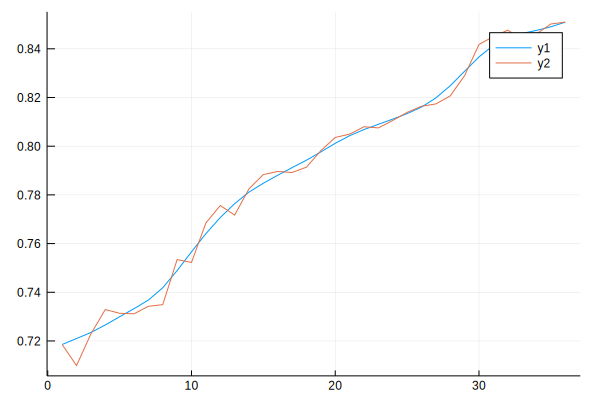

In [30]:
using Plots
plot([V_t[1,end,end,:] V_njt[1,end,end,:]])

Percentage point deviations from trend can be large, especially in large sectors like services. The model can only cpture this with large ex-post shocks to productivity. 

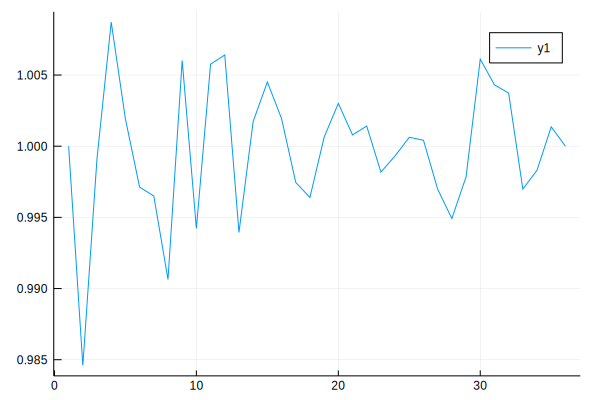

In [31]:
plot(V_njt[1,end,end,:] ./ V_t[1,end,end,:])

Ratio differences are small.

In [35]:
wage_ratio_0 = V_njt ./ V_t

1×25×24×36 Array{Float64,4}:
[:, :, 1, 1] =
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0

[:, :, 2, 1] =
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0

[:, :, 3, 1] =
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0

...

[:, :, 22, 1] =
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0

[:, :, 23, 1] =
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0

[:, :, 24, 1] =
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0

[:, :, 1, 2] =
 1.01265  1.07421  1.05624  1.17831  …  1.01305  0.914746  1.00131  1.23085

[:, :, 2, 2] =
 0.93587  0.990968  0.978758  1.01536  …  0.977385  0.990172  0.972696

[:, :, 3, 2] =
 0.93587  1.08646  0.964238  0.93823  …  0.94589  0.898574  0.957997

...

[:, :, 22, 2] =
 1.00984  1.03966  1.03398  1.01791  0.994564  …  0.953536  1.04615  1.03028

[:, :, 23, 2] =
 1.08165  0.944542  

In [38]:
labor_gap_0 = parameters[:one_over_rho]*wage_ratio_0
labor_gap_0 .= labor_gap_0 .- mean(labor_gap_0, 3)
L_star_0 = V_t
L_0 = L_star_0 .+ labor_gap_0

1×25×24×36 Array{Float64,4}:
[:, :, 1, 1] =
 0.061589  0.0690781  0.0489951  …  0.0588753  0.0282678  0.0368746

[:, :, 2, 1] =
 0.0398761  0.0331929  0.0498193  …  0.0237049  0.0330631  0.0218462

[:, :, 3, 1] =
 0.00198435  0.0129574  0.00223406  …  0.000918456  0.00310743  0.00161915

...

[:, :, 22, 1] =
 0.00743452  0.00224268  0.00216786  …  0.00432074  0.0127913  0.00836181

[:, :, 23, 1] =
 0.00817001  0.012592  0.0186192  …  0.0046242  0.00744794  0.00765139

[:, :, 24, 1] =
 0.701881  0.634067  0.623813  0.737393  …  0.690626  0.672794  0.71855

[:, :, 1, 2] =
 0.0642231  0.0678886  0.044149  …  0.0609734  0.0278982  0.0395581

[:, :, 2, 2] =
 0.0376354  0.0309009  0.0476535  …  0.0230717  0.0318011  0.0215381

[:, :, 3, 2] =
 0.00178652  0.0120472  0.00214105  …  0.000800815  0.00278116  0.00154245

...

[:, :, 22, 2] =
 0.00725728  0.00226707  0.00204522  …  0.00449154  0.0119563  0.00809792

[:, :, 23, 2] =
 0.00800367  0.0115299  0.0181191  …  0.00473713  0.00734704  0.00

In [39]:
wage_ratio_1 = (V_njt ./ L_0)  ./ (V_t ./ L_star_0)

1×25×24×36 Array{Float64,4}:
[:, :, 1, 1] =
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0

[:, :, 2, 1] =
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0

[:, :, 3, 1] =
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0

...

[:, :, 22, 1] =
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0

[:, :, 23, 1] =
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0

[:, :, 24, 1] =
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0

[:, :, 1, 2] =
 1.01287  1.07343  1.05527  1.17451  …  1.01285  0.915939  1.00132  1.22419

[:, :, 2, 2] =
 0.938129  0.992059  0.979514  1.0155  …  0.978098  0.990532  0.974682

[:, :, 3, 2] =
 0.983461  1.08092  0.987349  0.982097  …  1.00299  0.931904  0.994431

...

[:, :, 22, 2] =
 1.01219  1.03292  1.02467  1.018  0.99467  …  0.962176  1.04227  1.02855

[:, :, 23, 2] =
 1.07423  0.951131  1

In [44]:
wage_ratio_0[1,end,:,:]'

36×24 Array{Float64,2}:
 1.0       1.0       1.0       1.0       …  1.0       1.0       1.0     
 1.23085   0.972696  0.957997  1.02645      1.03028   0.991638  0.984589
 1.07046   0.973221  0.922961  0.957683     0.897967  0.960059  0.99915 
 1.02942   1.03624   1.06467   0.917914     0.950276  0.933135  1.00872 
 0.95643   1.02385   1.05539   1.01453      0.958964  0.98843   1.00192 
 0.92175   0.993683  1.00086   1.05498   …  1.13634   1.05169   0.997125
 0.993554  1.0013    0.948205  1.01957      1.10377   1.02248   0.996502
 1.08061   0.974152  0.962054  0.990117     1.02417   0.991102  0.990641
 0.934464  0.994661  0.980763  0.984912     0.852087  0.989787  1.00602 
 1.07297   0.985014  0.882958  0.986366     0.902935  1.0248    0.994223
 1.04457   1.03031   1.09344   0.948064  …  0.972595  0.992764  1.00576 
 0.832038  1.02374   1.04978   1.05163      1.03665   0.995892  1.00641 
 1.04358   0.969963  0.991447  1.02036      1.08319   1.00417   0.99394 
 ⋮                         

In [45]:
labor_gap_1 = parameters[:one_over_rho]*wage_ratio_1
labor_gap_1 .= labor_gap_1 .- mean(labor_gap_1, 3)
L_1 = L_star_0 .+ labor_gap_1

1×25×24×36 Array{Float64,4}:
[:, :, 1, 1] =
 0.061589  0.0690781  0.0489951  …  0.0588753  0.0282678  0.0368746

[:, :, 2, 1] =
 0.0398761  0.0331929  0.0498193  …  0.0237049  0.0330631  0.0218462

[:, :, 3, 1] =
 0.00198435  0.0129574  0.00223406  …  0.000918456  0.00310743  0.00161915

...

[:, :, 22, 1] =
 0.00743452  0.00224268  0.00216786  …  0.00432074  0.0127913  0.00836181

[:, :, 23, 1] =
 0.00817001  0.012592  0.0186192  …  0.0046242  0.00744794  0.00765139

[:, :, 24, 1] =
 0.701881  0.634067  0.623813  0.737393  …  0.690626  0.672794  0.71855

[:, :, 1, 2] =
 0.064225  0.0678943  0.0441478  0.0494203  …  0.060976  0.0278987  0.0395495

[:, :, 2, 2] =
 0.0376393  0.0309085  0.0476541  …  0.0230738  0.0318019  0.0215382

[:, :, 3, 2] =
 0.00183571  0.0120481  0.00216394  …  0.00085935  0.00281493  0.001577

...

[:, :, 22, 2] =
 0.00726123  0.00226678  0.00203568  …  0.00450162  0.0119528  0.0080943

[:, :, 23, 2] =
 0.00799784  0.011543  0.018117  …  0.00474326  0.00734669  

In [46]:
parameters2 = load("experiments/labor_adjustment/common_parameters.jld2")["parameters"]

Dict{Symbol,Any} with 45 entries:
  :S_nt                     => [0.0 0.0 … 0.0 0.0]…
  :one_over_rho             => 0.001
  :inner_tolerance          => 0.0002
  :S_nt_data                => [1184.95 -1239.14 … -406.84 1074.1]…
  :eta                      => 4.0
  :S                        => 100
  :sigma                    => 0.999
  :d                        => [0.991383 7.85e-7 … 0.000689 0.0004425; 7.42e-5 …
  :adjustment_tolerance     => 0.0004
  :middle_step_size         => 0.449329
  :A_njs                    => Array{Float64,4}[[1464.3 501.846 … 1566.09 7165.…
  :gamma_jk                 => [0.17112 0.273944 … 0.0195213 0.0108426; 0.04826…
  :p_sectoral               => [1.26077 2.37256 … 1.79398 1.0]…
  :B_j                      => [5.5087]…
  :max_iter_adjustment      => 100
  :w_njt                    => [53118.2 20374.8 … 1.48903e5 1.12031e6]…
  :global_sectoral_shock    => [6.92557e-15]…
  :country_shock_njs        => Array{Float64,4}[[-3.75419e-16 -3.28663e-16 … 7.…
  :i

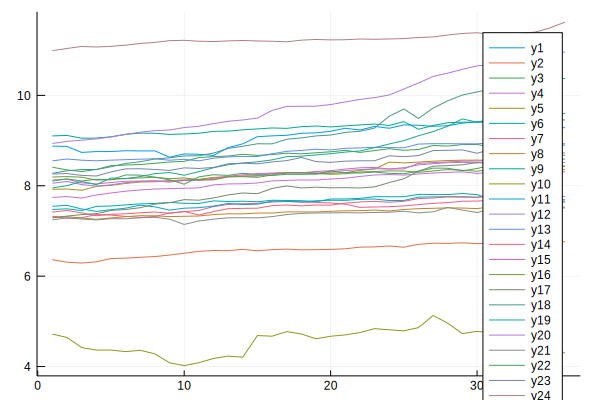

In [48]:
plot(log.(parameters2[:A][1,end,:,:]'))

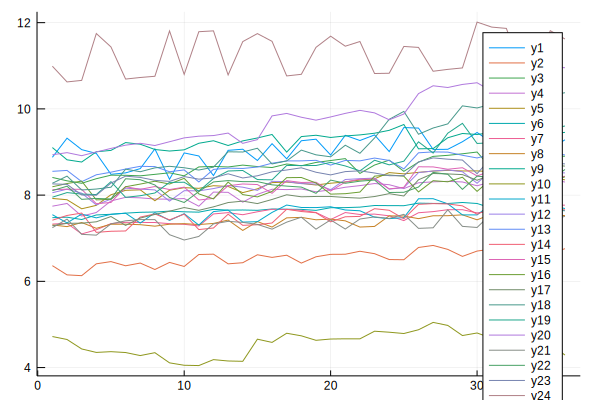

In [49]:
plot(log.(parameters[:A][1,end,:,:]'))

In [11]:
for (k, v) in results[1][2]
    println(k)
end

R_njs
d_njs_free
real_GDP
d_mnjs
L_njs_free
rho_njs
w_njs
L_njs
E_mjs
P_ns
input_price_njs
P_njs
e_mjs
A_njs


In [13]:
T=36


36

In [14]:
for t=1:T, (k, v) in results[t][2]
    results[t][2][k] = results[t][2][k][:,:,:,1]
end

In [17]:
results[2][2][:w_njs]

1×25×24 Array{Float64,3}:
[:, :, 1] =
 60582.8  20623.8  38052.7  98337.0  …  40225.9  151092.0  1.23657e6

[:, :, 2] =
 61643.6  20176.5  36354.7  1.00283e5  …  41903.4  1.52194e5  1.21585e6

[:, :, 3] =
 61882.3  20714.3  36161.1  98456.4  …  42287.5  1.5076e5  1.21676e6

...

[:, :, 22] =
 61361.6  14781.2  32407.3  91923.4  …  36884.3  1.51234e5  1.17685e6

[:, :, 23] =
 66041.9  18591.8  40093.3  98703.9  …  41790.6  1.56381e5  1.19069e6

[:, :, 24] =
 62569.4  20452.6  37871.2  98214.2  …  40877.0  1.51808e5  1.19867e6